# Exercise 1

In [1]:
from thinkdsp import Signal, Sinusoid, SquareSignal, TriangleSignal, SawtoothSignal, ParabolicSignal
from thinkdsp import normalize, unbias, PI2, decorate
from thinkdsp import Chirp
from thinkdsp import read_wave
from thinkdsp import Spectrum, Wave, UncorrelatedGaussianNoise, Spectrogram
from thinkdsp import Noise
from thinkdsp import CubicSignal
from thinkdsp import zero_pad

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import thinkstats2

from scipy.stats import linregress

import scipy
import scipy.fftpack

import scipy.signal

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

loglog = dict(xscale='log', yscale='log')

PI2 = np.pi * 2

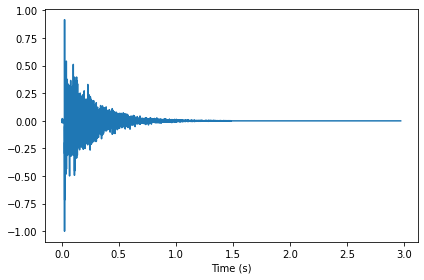

In [3]:
response = read_wave('Sounds/180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

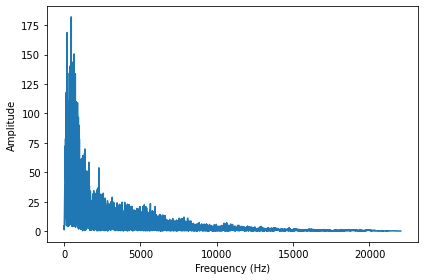

In [4]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

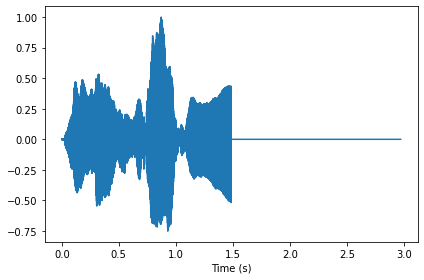

In [7]:
violin = read_wave('Sounds/92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

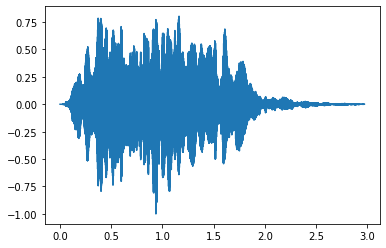

In [8]:
spectrum = violin.make_spectrum()
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()

In [9]:
output.make_audio()

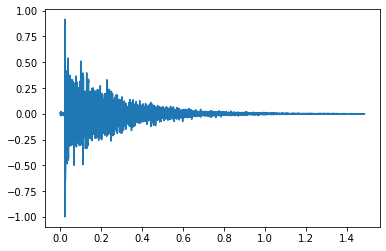

In [10]:
response.truncate(2**16)
response.plot()

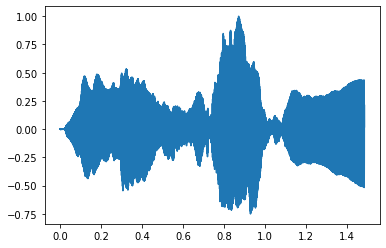

In [11]:
violin.truncate(2**16)
violin.plot()

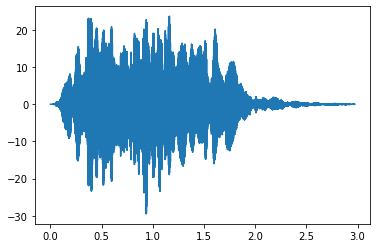

In [13]:
output2 = violin.convolve(response)
output2.plot()

In [14]:
output2.make_audio()

In [15]:
len(output), len(output2)

(131072, 131071)

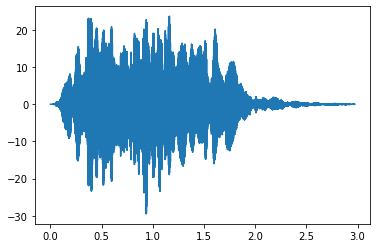

In [17]:
ys = scipy.signal.fftconvolve(violin.ys, response.ys)
output3 = Wave(ys, framerate=violin.framerate)
output3.plot()

In [18]:
output3.make_audio()

In [19]:
output2.max_diff(output3)

2.4868995751603507e-14

In [20]:
len(output3)

131071

# Exercise 2

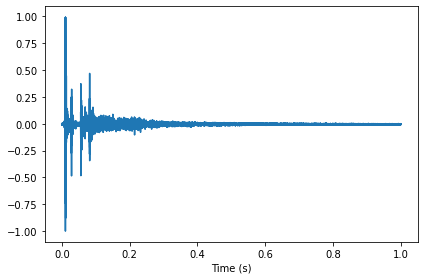

In [31]:
response = read_wave('Sounds/s1r2_0_1.wav')

start = 0.08
duration = 1
response = response.segment(start=start, duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

In [32]:
response.make_audio()

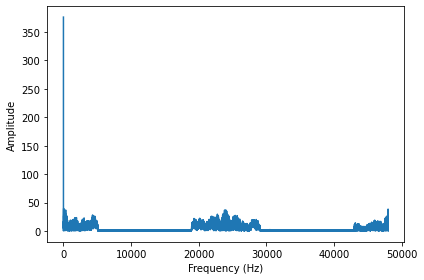

In [33]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

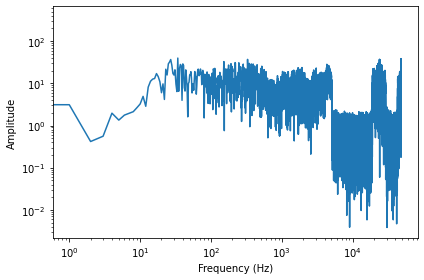

In [34]:
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude',
         xscale='log', yscale='log')

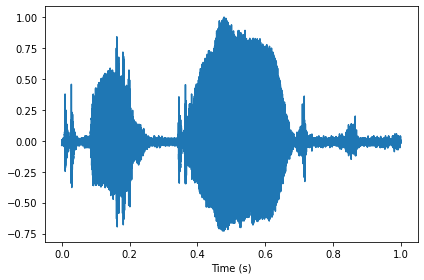

In [37]:
wave = read_wave('Sounds/233099__jarredgibb__goose-horn-1-96khz.wav')

start = 0.28
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

In [38]:
wave.make_audio()

In [39]:
spectrum = wave.make_spectrum()

In [40]:
len(spectrum.hs), len(transfer.hs)

(48001, 48001)

In [41]:
spectrum.fs

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 4.7998e+04, 4.7999e+04,
       4.8000e+04])

In [42]:
transfer.fs

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 4.7998e+04, 4.7999e+04,
       4.8000e+04])

In [43]:
output = (spectrum * transfer).make_wave()
output.normalize()

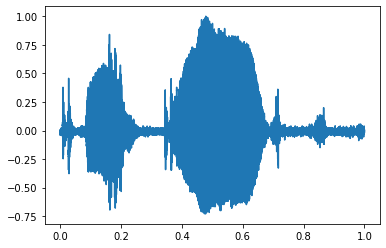

In [44]:
wave.plot()

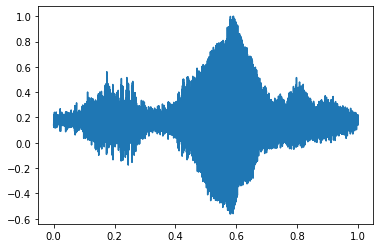

In [45]:
output.plot()

In [46]:
output.make_audio()

In [48]:
ys = scipy.signal.fftconvolve(wave.ys, response.ys)
convolved2 = Wave(ys, framerate=wave.framerate)

# convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()